In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model class that inherits from nn.Module
class Model(nn.Module):
    # Input layer (4 features of the iris dataset) -> 
    # Hidden layer1 (10 neurons) ->
    # Hidden layer2 (5 neurons) -> 
    # Output layer (3 classes)
    def __init__(self, input_size=4, hidden_size1=10, hidden_size2=5, output_size=3):
        super(Model, self).__init__() # Initialize the parent class

        # Define the layers of the neural network

        # Input layer to first hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size1)

        # First hidden layer to second hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)

        # Second hidden layer to output layer
        self.output = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        # Apply ReLU activation function to the first hidden layer
        x = F.relu(self.fc1(x))

        # Apply ReLU activation function to the second hidden layer
        x = F.relu(self.fc2(x))
        
        # Output layer (no activation function applied)
        x = self.output(x)

        return x

In [3]:
# Pick a random seed for reproducibility
torch.manual_seed(42)
# Create an instance of the Model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# This line is used to display plots inline in Jupyter notebooks
%matplotlib inline 

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)

In [6]:
df.head()  # Display the first few rows of the DataFrame

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
# Change last column from string to int
df['variety'] = df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})
df

/var/folders/96/6g3fwyp57zzcf7yjss5mn5b40000gn/T/ipykernel_39317/968843418.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Train Test Split: Set X and y
X = df.drop('variety', axis=1) # Features (all columns except 'variety')
y = df['variety'] # Target variable (the 'variety' column)

In [10]:
# Convert these to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train Test Split: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
# Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [58]:
# Set the criterion of the model to measure the error, how far off the predictions are
criterion = nn.CrossEntropyLoss()

# Choose an optimizer to update the weights of the model
# (If error doesnt go down after a bunch of interations i.e. epochs, try changing the learning rate lower)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [59]:
# Train the model
num_epochs = 100  # Number of epochs to train the model (epoch is one full pass through the dataset)
losses = []  # List to store loss values for each epoch

# Loop through the number of epochs
for epoch in range(num_epochs):

    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model.forward(X_train)

    # Compute the loss
    loss = criterion(y_pred, y_train) # Calculate the error between predicted and actual labels

    # Keep track of the loss value
    losses.append(loss.detach().numpy())  # Detach the loss from the computation graph and convert to numpy

    # Print the loss every 100 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Back propagation: Compute gradients of the loss with respect to model parameters
    # Take the error rate of forward pass and calculate the gradients
    optimizer.zero_grad()  # Zero the gradients before the backward pass
    loss.backward()  # Backward pass: Compute gradients
    optimizer.step()  # Update the model parameters using the optimizer

Epoch [10/100], Loss: 0.0469
Epoch [20/100], Loss: 0.0458
Epoch [30/100], Loss: 0.0456
Epoch [40/100], Loss: 0.0455
Epoch [50/100], Loss: 0.0454
Epoch [60/100], Loss: 0.0454
Epoch [70/100], Loss: 0.0454
Epoch [80/100], Loss: 0.0453
Epoch [90/100], Loss: 0.0453
Epoch [100/100], Loss: 0.0453


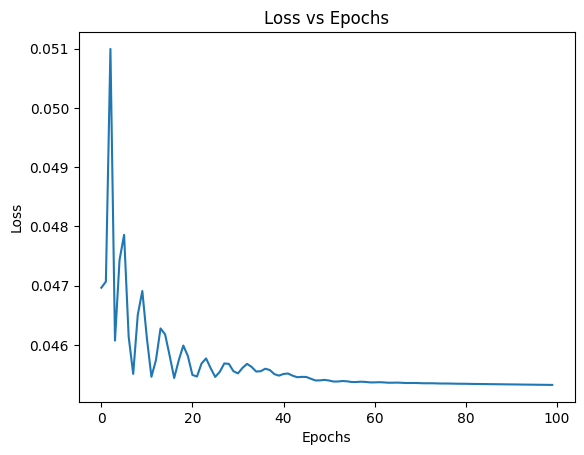

In [60]:
# Graph the loss values
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()